In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
AY_data = pd.read_csv('Total Away Yellow Cards/AY_clean.csv')
AY_data

,Div,Day_Time,HomeTeam,AwayTeam,FTR,HTR,FTHG,FTAG,TGG,HTHG,HTAG,THGG,HS,AS,HST,AST,HF,AF,HC,AC,HY,HR,AR,AvgCH,AvgCD,AvgCA,AvgC>2.5,AvgC<2.5,AY
0,0.0,1.0,129,14,0.0,0.0,0,4,4,0,1,1,6,25,1,10,16,11,0,6,2,0,0,8.69,6.05,1.31,1.34,3.29,1
1,0.0,2.0,11,76,1.0,1.0,4,4,8,3,3,6,20,9,8,6,9,14,8,7,1,0,0,2.79,3.67,2.42,1.62,2.31,2
2,0.0,2.0,57,47,0.0,0.0,1,2,3,0,2,2,24,17,5,8,9,9,4,2,0,0,0,2.20,3.68,3.15,1.65,2.26,1
3,0.0,2.0,70,98,2.0,2.0,3,2,5,2,1,3,11,13,7,6,13,10,4,5,1,0,0,2.44,3.60,2.81,1.68,2.19,2
4,0.0,2.0,115,18,2.0,2.0,5,0,5,2,0,2,19,4,9,1,5,12,7,0,1,0,0,1.76,4.02,4.32,1.64,2.26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,4.0,2.0,111,45,0.0,1.0,1,3,4,1,1,2,7,20,5,11,6,14,3,10,1,0,0,7.08,4.93,1.42,1.55,2.45,1
8951,4.0,1.0,19,116,1.0,2.0,1,1,2,1,0,1,13,13,5,11,15,17,7,3,3,0,0,1.82,4.17,3.85,1.35,3.14,3
8952,4.0,1.0,50,126,2.0,2.0,3,0,3,3,0,3,4,13,4,3,8,13,4,9,4,2,1,1.67,4.26,4.62,1.50,2.55,0
8953,4.0,1.0,64,97,0.0,1.0,3,4,7,2,2,4,12,18,8,11,3,7,5,4,0,0,0,1.55,4.86,5.05,1.32,3.34,2


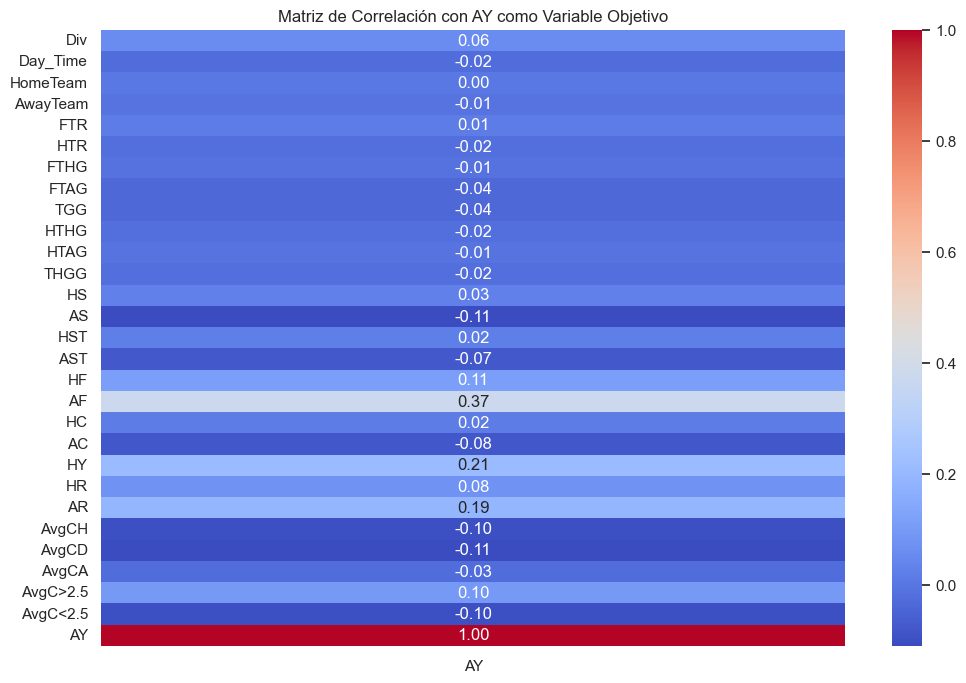

In [3]:
# Lista de variables objetivo
objective_variables = ['AY']

# Iterar sobre cada variable objetivo
for target_variable in objective_variables:
    # Crear un subconjunto de datos numéricos
    final_data = AY_data.select_dtypes(include=['number'])

    # Crear la matriz de correlación para la variable objetivo actual
    correlation_matrix = final_data.corr()
    
    # Crear un mapa de calor para visualizar la matriz de correlación
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix[[target_variable]], annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Matriz de Correlación con {target_variable} como Variable Objetivo')
    plt.show()

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Lista de variables objetivo
objective_variables = ['AY']

# Iterar sobre cada variable objetivo
for target_variable in objective_variables:
    # Crear un subconjunto de datos numéricos y la variable objetivo actual
    final_data = AY_data.select_dtypes(include=['number'])
    final_data = final_data[[target_variable] + final_data.columns.tolist()]
    
    # Calcular VIF para cada característica en relación a la variable objetivo
    vif_data = pd.DataFrame()
    vif_data["Feature"] = final_data.columns
    vif_data["VIF"] = [variance_inflation_factor(final_data.values, i) for i in range(final_data.shape[1])]
    
    # Mostrar los resultados de VIF
    print(f"VIF para {target_variable}:")
    print(vif_data)

VIF para AY:
     Feature         VIF
0         AY         inf
1        Div    3.447676
2   Day_Time    6.436277
3   HomeTeam    4.183010
4   AwayTeam    4.176549
5        FTR   11.362134
6        HTR   16.971449
7       FTHG         inf
8       FTAG         inf
9        TGG         inf
10      HTHG         inf
11      HTAG         inf
12      THGG         inf
13        HS   18.190380
14        AS   15.691937
15       HST   11.192157
16       AST    9.921666
17        HF   13.142751
18        AF   13.030877
19        HC    6.385467
20        AC    5.615222
21        HY    3.898248
22        HR    1.195222
23        AR    1.196719
24     AvgCH   62.680787
25     AvgCD  917.203954
26     AvgCA  146.805333
27  AvgC>2.5   28.586224
28  AvgC<2.5  225.524555
29        AY         inf


In [5]:
AY_data.columns

Index(['Div', 'Day_Time', 'HomeTeam', 'AwayTeam', 'FTR', 'HTR', 'FTHG', 'FTAG',
       'TGG', 'HTHG', 'HTAG', 'THGG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF',
       'HC', 'AC', 'HY', 'HR', 'AR', 'AvgCH', 'AvgCD', 'AvgCA', 'AvgC>2.5',
       'AvgC<2.5', 'AY'],
      dtype='object')

In [6]:
# Eliminar las columnas especificadas
columns_to_drop = ['HTR', 'FTAG', 'HTAG', 'HTR', 'TGG', 'THGG', 'AS', 'AST', 'AC', 'AvgCD', 'AvgC>2.5', 'AvgC<2.5']
AY_data = AY_data.drop(columns=columns_to_drop, errors='ignore')
AY_data

,Div,Day_Time,HomeTeam,AwayTeam,FTR,FTHG,HTHG,HS,HST,HF,AF,HC,HY,HR,AR,AvgCH,AvgCA,AY
0,0.0,1.0,129,14,0.0,0,0,6,1,16,11,0,2,0,0,8.69,1.31,1
1,0.0,2.0,11,76,1.0,4,3,20,8,9,14,8,1,0,0,2.79,2.42,2
2,0.0,2.0,57,47,0.0,1,0,24,5,9,9,4,0,0,0,2.20,3.15,1
3,0.0,2.0,70,98,2.0,3,2,11,7,13,10,4,1,0,0,2.44,2.81,2
4,0.0,2.0,115,18,2.0,5,2,19,9,5,12,7,1,0,0,1.76,4.32,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,4.0,2.0,111,45,0.0,1,1,7,5,6,14,3,1,0,0,7.08,1.42,1
8951,4.0,1.0,19,116,1.0,1,1,13,5,15,17,7,3,0,0,1.82,3.85,3
8952,4.0,1.0,50,126,2.0,3,3,4,4,8,13,4,4,2,1,1.67,4.62,0
8953,4.0,1.0,64,97,0.0,3,2,12,8,3,7,5,0,0,0,1.55,5.05,2


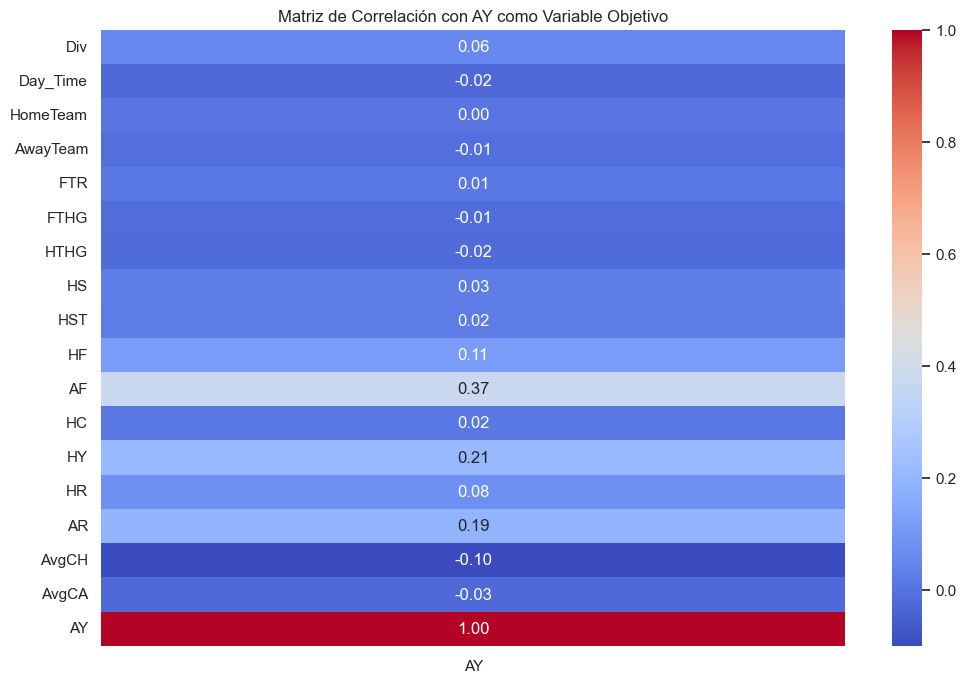

In [7]:
# Lista de variables objetivo
objective_variables = ['AY']

# Iterar sobre cada variable objetivo
for target_variable in objective_variables:
    # Crear un subconjunto de datos numéricos
    final_data = AY_data.select_dtypes(include=['number'])

    # Crear la matriz de correlación para la variable objetivo actual
    correlation_matrix = final_data.corr()
    
    # Crear un mapa de calor para visualizar la matriz de correlación
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix[[target_variable]], annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Matriz de Correlación con {target_variable} como Variable Objetivo')
    plt.show()

In [8]:
# Lista de variables objetivo
objective_variables = ['AY']

# Iterar sobre cada variable objetivo
for target_variable in objective_variables:
    # Crear un subconjunto de datos numéricos y la variable objetivo actual
    final_data = AY_data.select_dtypes(include=['number'])
    final_data = final_data[[target_variable] + final_data.columns.tolist()]
    
    # Calcular VIF para cada característica en relación a la variable objetivo
    vif_data = pd.DataFrame()
    vif_data["Feature"] = final_data.columns
    vif_data["VIF"] = [variance_inflation_factor(final_data.values, i) for i in range(final_data.shape[1])]
    
    # Mostrar los resultados de VIF
    print(f"VIF para {target_variable}:")
    print(vif_data)

VIF para AY:
     Feature        VIF
0         AY        inf
1        Div   3.284190
2   Day_Time   5.750220
3   HomeTeam   3.994643
4   AwayTeam   3.977168
5        FTR   4.830333
6       FTHG   7.938018
7       HTHG   3.305513
8         HS  16.268168
9        HST  10.968078
10        HF  11.113160
11        AF  10.860938
12        HC   6.171183
13        HY   3.870976
14        HR   1.167715
15        AR   1.176262
16     AvgCH   3.492448
17     AvgCA   3.804657
18        AY        inf


In [9]:
AY_data

,Div,Day_Time,HomeTeam,AwayTeam,FTR,FTHG,HTHG,HS,HST,HF,AF,HC,HY,HR,AR,AvgCH,AvgCA,AY
0,0.0,1.0,129,14,0.0,0,0,6,1,16,11,0,2,0,0,8.69,1.31,1
1,0.0,2.0,11,76,1.0,4,3,20,8,9,14,8,1,0,0,2.79,2.42,2
2,0.0,2.0,57,47,0.0,1,0,24,5,9,9,4,0,0,0,2.20,3.15,1
3,0.0,2.0,70,98,2.0,3,2,11,7,13,10,4,1,0,0,2.44,2.81,2
4,0.0,2.0,115,18,2.0,5,2,19,9,5,12,7,1,0,0,1.76,4.32,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,4.0,2.0,111,45,0.0,1,1,7,5,6,14,3,1,0,0,7.08,1.42,1
8951,4.0,1.0,19,116,1.0,1,1,13,5,15,17,7,3,0,0,1.82,3.85,3
8952,4.0,1.0,50,126,2.0,3,3,4,4,8,13,4,4,2,1,1.67,4.62,0
8953,4.0,1.0,64,97,0.0,3,2,12,8,3,7,5,0,0,0,1.55,5.05,2


In [10]:
from sklearn.model_selection import train_test_split

# Definir las características (X) y la variable objetivo (y)
X = AY_data.drop(columns=['AY'])  # Características excluyendo la variable objetivo
y = AY_data['AY']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Inicializar el modelo Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# Hacer predicciones sobre el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 1.6200020100502512
R^2 Score: 0.20155421208240798


In [13]:
from sklearn.model_selection import GridSearchCV

# Definir la cuadrícula de hiperparámetros a explorar
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15]
}

# Inicializar el GridSearchCV con el modelo Random Forest
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # Número de divisiones para la validación cruzada
                           scoring='r2',  # Métrica de evaluación
                           verbose=1,
                           n_jobs=-1)  # Utilizar todos los núcleos de CPU disponibles

# Entrenar GridSearchCV en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Obtener el mejor modelo entrenado
best_rf_model = grid_search.best_estimator_

# Hacer predicciones y evaluar el modelo ajustado
y_pred_grid = best_rf_model.predict(X_test)
r2_grid = r2_score(y_test, y_pred_grid)
print(f"R^2 Score después de ajuste de hiperparámetros: {r2_grid}")

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Mejores hiperparámetros encontrados:
{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 300}
R^2 Score después de ajuste de hiperparámetros: 0.21484333012391277


In [14]:
from sklearn.ensemble import RandomForestRegressor

# Definir el modelo con los mejores hiperparámetros
rf = RandomForestRegressor(n_estimators=300, max_depth=10, min_samples_split=10)

# Entrenar el modelo con los datos limpios TGG_data
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=300)

In [15]:
importances = rf.feature_importances_

In [16]:
feature_names = list(X_train.columns)  # Obtener nombres de características si X_train es un DataFrame

# Crear un DataFrame de importancias de características
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar las características por importancia descendente
feature_importances = feature_importances.sort_values('Importance', ascending=False).reset_index(drop=True)

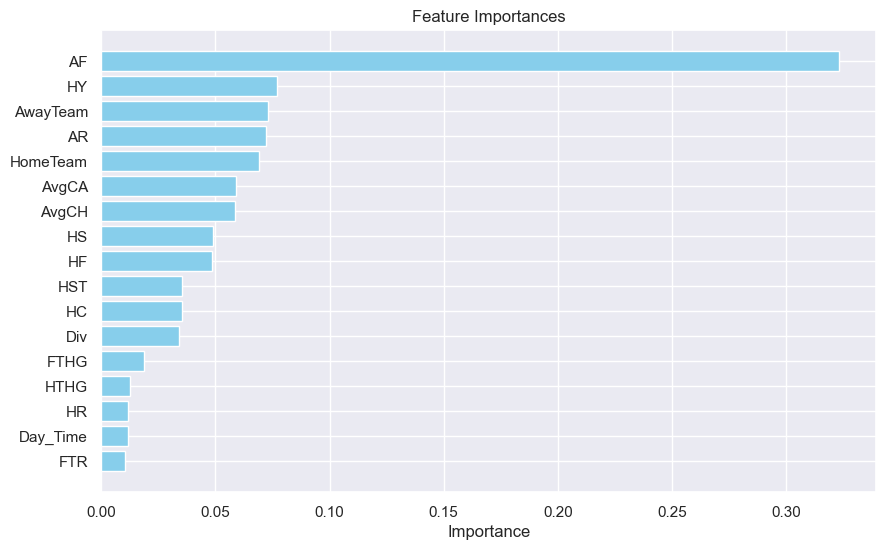

In [17]:
# Graficar las importancias de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la característica más importante en la parte superior
plt.show()

In [18]:
# Definir la variable objetivo específica
target_variable = 'AY'

# Seleccionar variables numéricas excluyendo la variable objetivo
X = AY_data.drop(columns=[target_variable])
y = AY_data[target_variable]

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Obtener la importancia de las variables
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Mostrar importancia de las variables para 'TGG' en el modelo de Random Forest
print(f"\nImportancia de las variables para '{target_variable}' en el modelo de Random Forest:")
for i, idx in enumerate(indices):
    print(f"{i+1}. {X.columns[idx]}: {importances[idx]}")


Importancia de las variables para 'AY' en el modelo de Random Forest:
1. AF: 0.1703668325915762
2. AwayTeam: 0.09734785586664804
3. HomeTeam: 0.09697070850879784
4. AvgCA: 0.08382783689700739
5. AvgCH: 0.07817752445107135
6. HF: 0.06911563410760752
7. HS: 0.0691028512409342
8. HC: 0.05839340172842829
9. HY: 0.05384261484249105
10. HST: 0.05235919664427913
11. AR: 0.03506485136344775
12. Div: 0.03379076499292528
13. FTHG: 0.029047059100886306
14. HTHG: 0.021234464156113943
15. Day_Time: 0.020383711513254243
16. FTR: 0.01951335191483912
17. HR: 0.011461340079692467


In [38]:
AY_data

,Div,Day_Time,HomeTeam,AwayTeam,FTR,FTHG,HTHG,HS,HST,HF,AF,HC,HY,HR,AR,AvgCH,AvgCA,AY
0,0.0,1.0,129,14,0.0,0,0,6,1,16,11,0,2,0,0,8.69,1.31,1
1,0.0,2.0,11,76,1.0,4,3,20,8,9,14,8,1,0,0,2.79,2.42,2
2,0.0,2.0,57,47,0.0,1,0,24,5,9,9,4,0,0,0,2.20,3.15,1
3,0.0,2.0,70,98,2.0,3,2,11,7,13,10,4,1,0,0,2.44,2.81,2
4,0.0,2.0,115,18,2.0,5,2,19,9,5,12,7,1,0,0,1.76,4.32,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,4.0,2.0,111,45,0.0,1,1,7,5,6,14,3,1,0,0,7.08,1.42,1
8951,4.0,1.0,19,116,1.0,1,1,13,5,15,17,7,3,0,0,1.82,3.85,3
8952,4.0,1.0,50,126,2.0,3,3,4,4,8,13,4,4,2,1,1.67,4.62,0
8953,4.0,1.0,64,97,0.0,3,2,12,8,3,7,5,0,0,0,1.55,5.05,2


In [9]:
# Ajusta new_data para que coincida con las columnas de entrenamiento
new_data = pd.DataFrame({
    'Div': [4.0],  
    'Day_Time': [2.0],
    'HomeTeam': [59],  
    'AwayTeam': [83],
    'FTR': [2.0],
    'FTHG': [1],
    'HTHG': [0],
    'HS':[18],
    'HST': [4],
    'HF': [13],
    'AF': [7],
    'HC': [9],
    'HY': [2],
    'HR': [0],
    'AR': [0],
    'AvgCH': [2.25],
    'AvgCA': [2.70],  
})

# Hacer la predicción utilizando el modelo entrenado
predicted_AY = rf_model.predict(new_data)
print(f"Predicción de AY para el nuevo partido: {predicted_AY}")

NameError: name 'pd' is not defined